In [2]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visualization using basic graphs
import seaborn as sns # for dat visualization with more indepth themes
import sklearn



In [3]:
df=pd.read_csv('car_data.csv')

In [4]:
#remove the CAr_Name from the final data set as we assume  the car name is not impacting the selling price ( Remove a varabale that may not have impact of the dependant variable )
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',]]

In [5]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
final_dataset['Current_Year']=2022

In [8]:
final_dataset['Year_Range']=final_dataset['Current_Year']-final_dataset['Year']

In [19]:
#In the above one new derived feature has been added the year range , now we can drop the  Year amd Current Year can  get rid off
final_dataset.drop(['Year'],axis=1,inplace=True)

In [20]:
#Converting Category Features to some other values 
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [21]:
Corr_Plot = final_dataset.corr()
Corr_Plot

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,Year_Range,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,NaN,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,NaN,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104,-0.053469,0.055687,0.124269,-0.050316
Current_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Range,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,NaN,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,NaN,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,NaN,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,NaN,-0.000394,-0.098643,0.091013,0.063240,1.000000


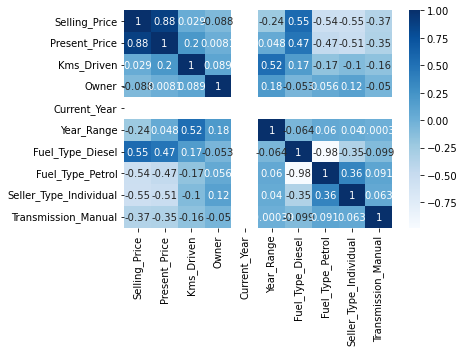

In [22]:
import matplotlib.pyplot as plt # for visualization using basic graphs
import seaborn as sns # for dat visualization with more indepth themes
sns.heatmap(Corr_Plot,annot=True,cmap='Blues')
plt.show()

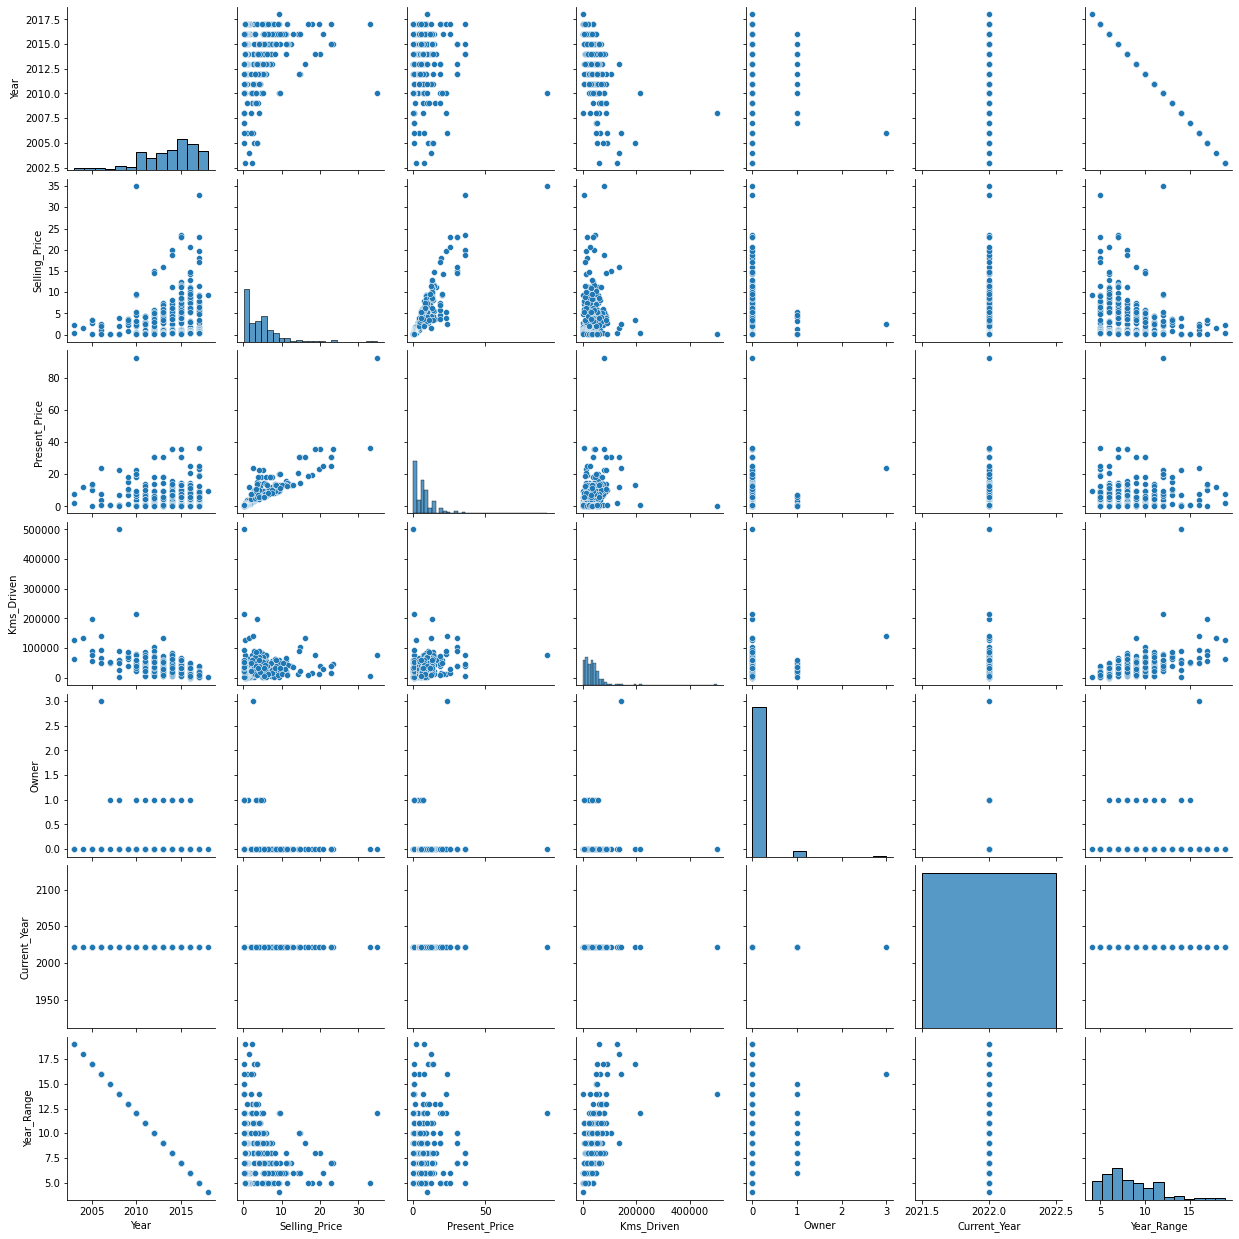

In [11]:
sns.pairplot(final_dataset)

C:\Users\thulak01\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


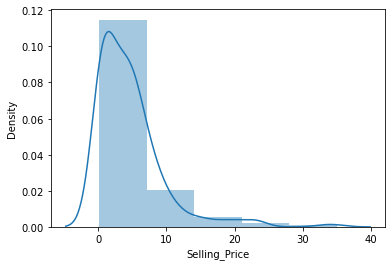

In [55]:
sns.distplot(df['Selling_Price'],bins=5,kde=True)
plt.show()

In [23]:
#Define the Dependant and Independant Variables 
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([-0.36926796,  6.45816379,  2.90843338,  0.49671541,  2.11573271,
       19.49383491,  8.21659066,  5.78389947,  1.94224406, -0.57924149,
        6.32551406,  3.0599679 ,  4.5878305 ,  3.15926577,  8.15880136,
        0.46267992,  7.47664828,  2.48921891,  1.56484929,  5.68845484,
        4.52045681,  2.7244399 ,  1.58005766,  9.00176017, 10.14862123,
       -1.93499639,  0.18850314,  3.26726745, -0.03401646,  6.65283837,
        3.37641808,  2.9960715 ,  2.73047085, -0.38814419,  9.2216226 ,
       16.67746673,  3.83083305, -0.17996163,  8.60612938, -3.08487475,
        6.19446097,  0.09320922,  8.91183604,  4.57716619,  4.11376163,
        3.35727458,  2.07848196, 21.25991079,  6.79368153,  5.27896774,
        7.51062552,  5.46080434,  2.15997563,  1.73480214,  0.30591756,
        7.98595637,  0.47653445,  7.65678577,  2.14771786,  6.10535937,
        4.83528868])

In [32]:
testing_data_model_score = model.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_score = model.score(X_train, y_train)
print("training_score",training_score)

Model Score/Performance on Testing data 0.8606864945508188
training_score 0.8879815398527086


In [34]:
#Calculate the R2_Score
from sklearn.metrics import r2_score
R2_Score = r2_score(y_pred, y_test)
print("R2 score  :" ,R2_Score*100)

R2 score  : 78.69261097019505


In [57]:
testing_data_model_score = model.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)
training_data_model_score = model.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9027459441429422
Model Score/Performance on Training data 0.8776556247149859


In [38]:
Y_Predict=model.predict(X_test)

In [40]:
Y_Predict

array([-0.36926796,  6.45816379,  2.90843338,  0.49671541,  2.11573271,
       19.49383491,  8.21659066,  5.78389947,  1.94224406, -0.57924149,
        6.32551406,  3.0599679 ,  4.5878305 ,  3.15926577,  8.15880136,
        0.46267992,  7.47664828,  2.48921891,  1.56484929,  5.68845484,
        4.52045681,  2.7244399 ,  1.58005766,  9.00176017, 10.14862123,
       -1.93499639,  0.18850314,  3.26726745, -0.03401646,  6.65283837,
        3.37641808,  2.9960715 ,  2.73047085, -0.38814419,  9.2216226 ,
       16.67746673,  3.83083305, -0.17996163,  8.60612938, -3.08487475,
        6.19446097,  0.09320922,  8.91183604,  4.57716619,  4.11376163,
        3.35727458,  2.07848196, 21.25991079,  6.79368153,  5.27896774,
        7.51062552,  5.46080434,  2.15997563,  1.73480214,  0.30591756,
        7.98595637,  0.47653445,  7.65678577,  2.14771786,  6.10535937,
        4.83528868])

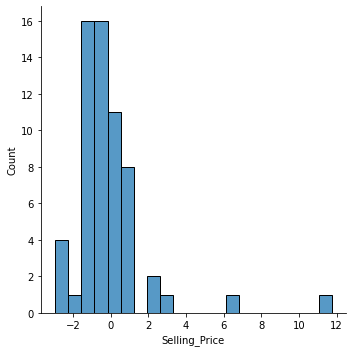

In [41]:
sns.displot(y_test-Y_Predict)

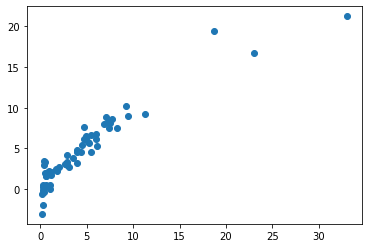

In [42]:
plt.scatter(y_test,Y_Predict)

In [51]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, Y_Predict))
print('MSE:', metrics.mean_squared_error(y_test, Y_Predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_Predict)))

MAE: 1.2356821792869117
MSE: 4.385460059100884
RMSE: 2.094149005945108
